# Part 2
**Next, select only 0-9 training images from the above dataset, and use the pretrained network to train on MNIST dataset. Use the standard MNIST train and test splits (http://yann.lecun.com/exdb/mnist/). How does this pretrained network perform in comparison to a randomly initialized network in terms of convergence time, final accuracy and other possible training quality metrics? Do a thorough analysis. Please save your model checkpoints.**

# a) Train on 0-9 class images

Get data into memory using wget and unzip 

In [2]:
!wget -qq https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip

In [3]:
!unzip -qq trainPart1.zip

Make required imports 

In [4]:
from fastai import *
from fastai.vision import *
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

- Get lists of images and labels of required classes
- Create dataframe
- Split data into 0.9/0.1 as training/validation 

In [6]:
classes = ['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 
           'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010']
all_images = []
for name in classes:
    path = 'train/'+ name
    all_images.extend([os.path.join(path, image) for image in os.listdir(path)])

len(all_images), all_images[:2]

(400, ['train/Sample001/img001-047.png', 'train/Sample001/img001-025.png'])

In [7]:
df = pd.DataFrame({'image': all_images})
df['label'] = df['image'].apply(lambda x: x.split('/')[-2])
df.head()

,image,label
0,train/Sample001/img001-047.png,Sample001
1,train/Sample001/img001-025.png,Sample001
2,train/Sample001/img001-046.png,Sample001
3,train/Sample001/img001-036.png,Sample001
4,train/Sample001/img001-017.png,Sample001


In [8]:
def split_dataframe(df):
    x_train, x_valid = train_test_split(df, stratify=df['label'], test_size=0.1, random_state=42)
    return x_train.index, x_valid.index 
train_idx, val_idx = split_dataframe(df)

- Create databunch with image size 224 
- Take a look at a batch

In [9]:
img_size = 224
batch_size = 128
data = (ImageList.from_df(df, path='.')
        .split_by_idxs(train_idx, val_idx)
        .label_from_df(cols=['label']) 
        .transform(get_transforms(do_flip=False), size=img_size, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=batch_size).normalize()  
       )

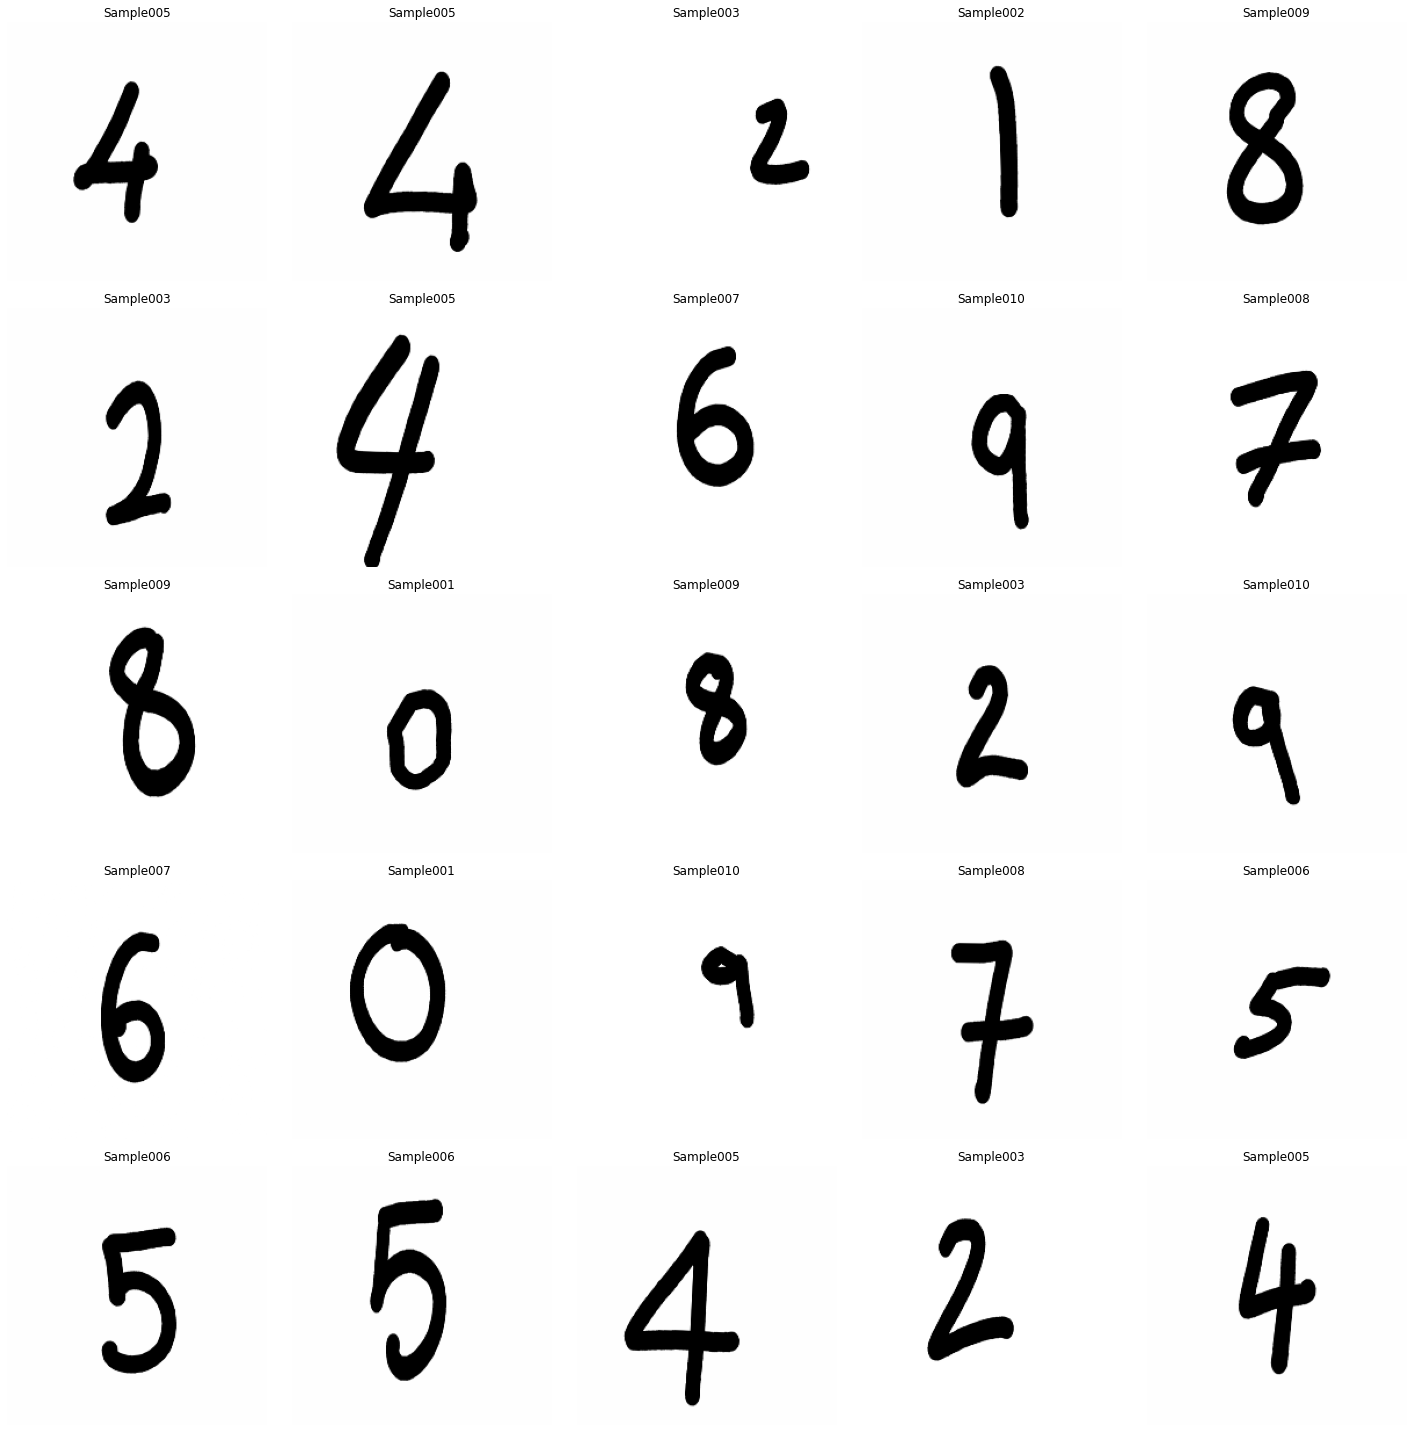

In [10]:
data.show_batch()

- Create CNN learner having ResNet18 architecture with random initialization
- Use learning rate finder to see how losses change accoring to various learning rates

In [11]:
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 3.02E-02


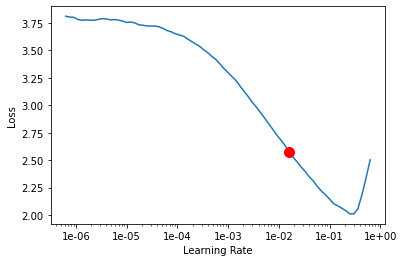

In [12]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

- Choose a learning rate of 1e-1
- Train all layers for 40 epochs using one cycle policy

In [13]:
learn.fit_one_cycle(40, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,3.942718,54955.613281,0.100000,00:14
1,3.354152,2778344.500000,0.100000,00:13
2,2.843168,9808792.000000,0.100000,00:13
3,2.530430,9276319.000000,0.100000,00:13
4,2.305744,4481835.000000,0.100000,00:13
5,2.159649,2820055.500000,0.100000,00:13
6,2.057224,2486922.500000,0.100000,00:13
7,1.995507,750450.625000,0.100000,00:13
8,1.933453,214498.843750,0.100000,00:13
9,1.866441,43628.175781,0.100000,00:13


Plot losses, accuracies and learning rates over the training process

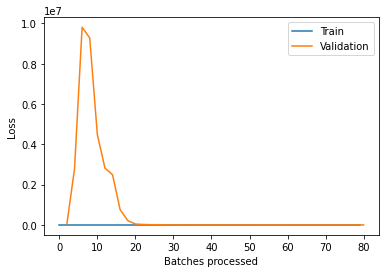

In [14]:
learn.recorder.plot_losses()

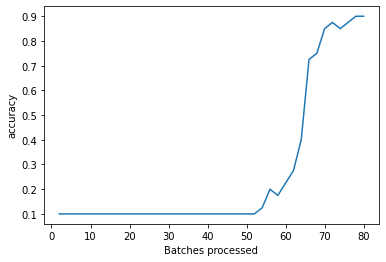

In [15]:
learn.recorder.plot_metrics()

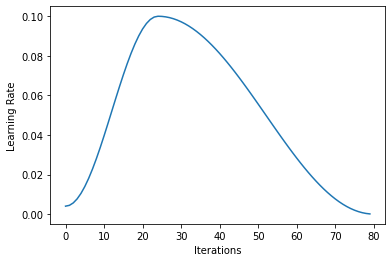

In [16]:
learn.recorder.plot_lr()

Save model till now 

In [17]:
learn.save('/content/drive/My Drive/MIDAS Task 2/part2-0-9-224-s1')

In [22]:
learn.load('/content/drive/My Drive/MIDAS Task 2/part2-0-9-224-s1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.91E-03


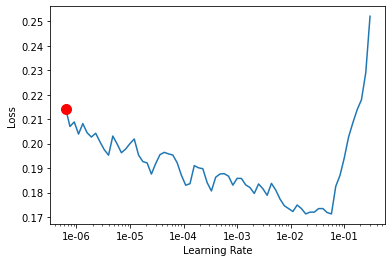

In [18]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

Train more for 15 epochs with lr slice(6e-7, 2e-3)

In [19]:
learn.fit_one_cycle(15, slice(6e-7, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.152991,0.530618,0.900000,00:13
1,0.177048,0.515433,0.900000,00:13
2,0.186590,0.507797,0.925000,00:13
3,0.167695,0.501756,0.925000,00:13
4,0.167470,0.485804,0.925000,00:13
5,0.155277,0.466852,0.925000,00:13
6,0.150232,0.449715,0.925000,00:13
7,0.147884,0.448310,0.925000,00:13
8,0.151490,0.450686,0.925000,00:13
9,0.153528,0.449340,0.925000,00:13


In [20]:
learn.save('/content/drive/My Drive/MIDAS Task 2/part2-0-9-224-s2')

# b) MNIST 

## Using pretrained model from part a)

Download MNIST dataset

In [21]:
path = untar_data(URLs.MNIST, dest='.'); path

PosixPath('mnist_png')

- Create databunch with image size 28
- Look at a batch

In [22]:
data = ImageDataBunch.from_folder('./mnist_png', train='training',
                                  ds_tfms=get_transforms(do_flip=False),
                                  valid='testing', size=28).normalize()

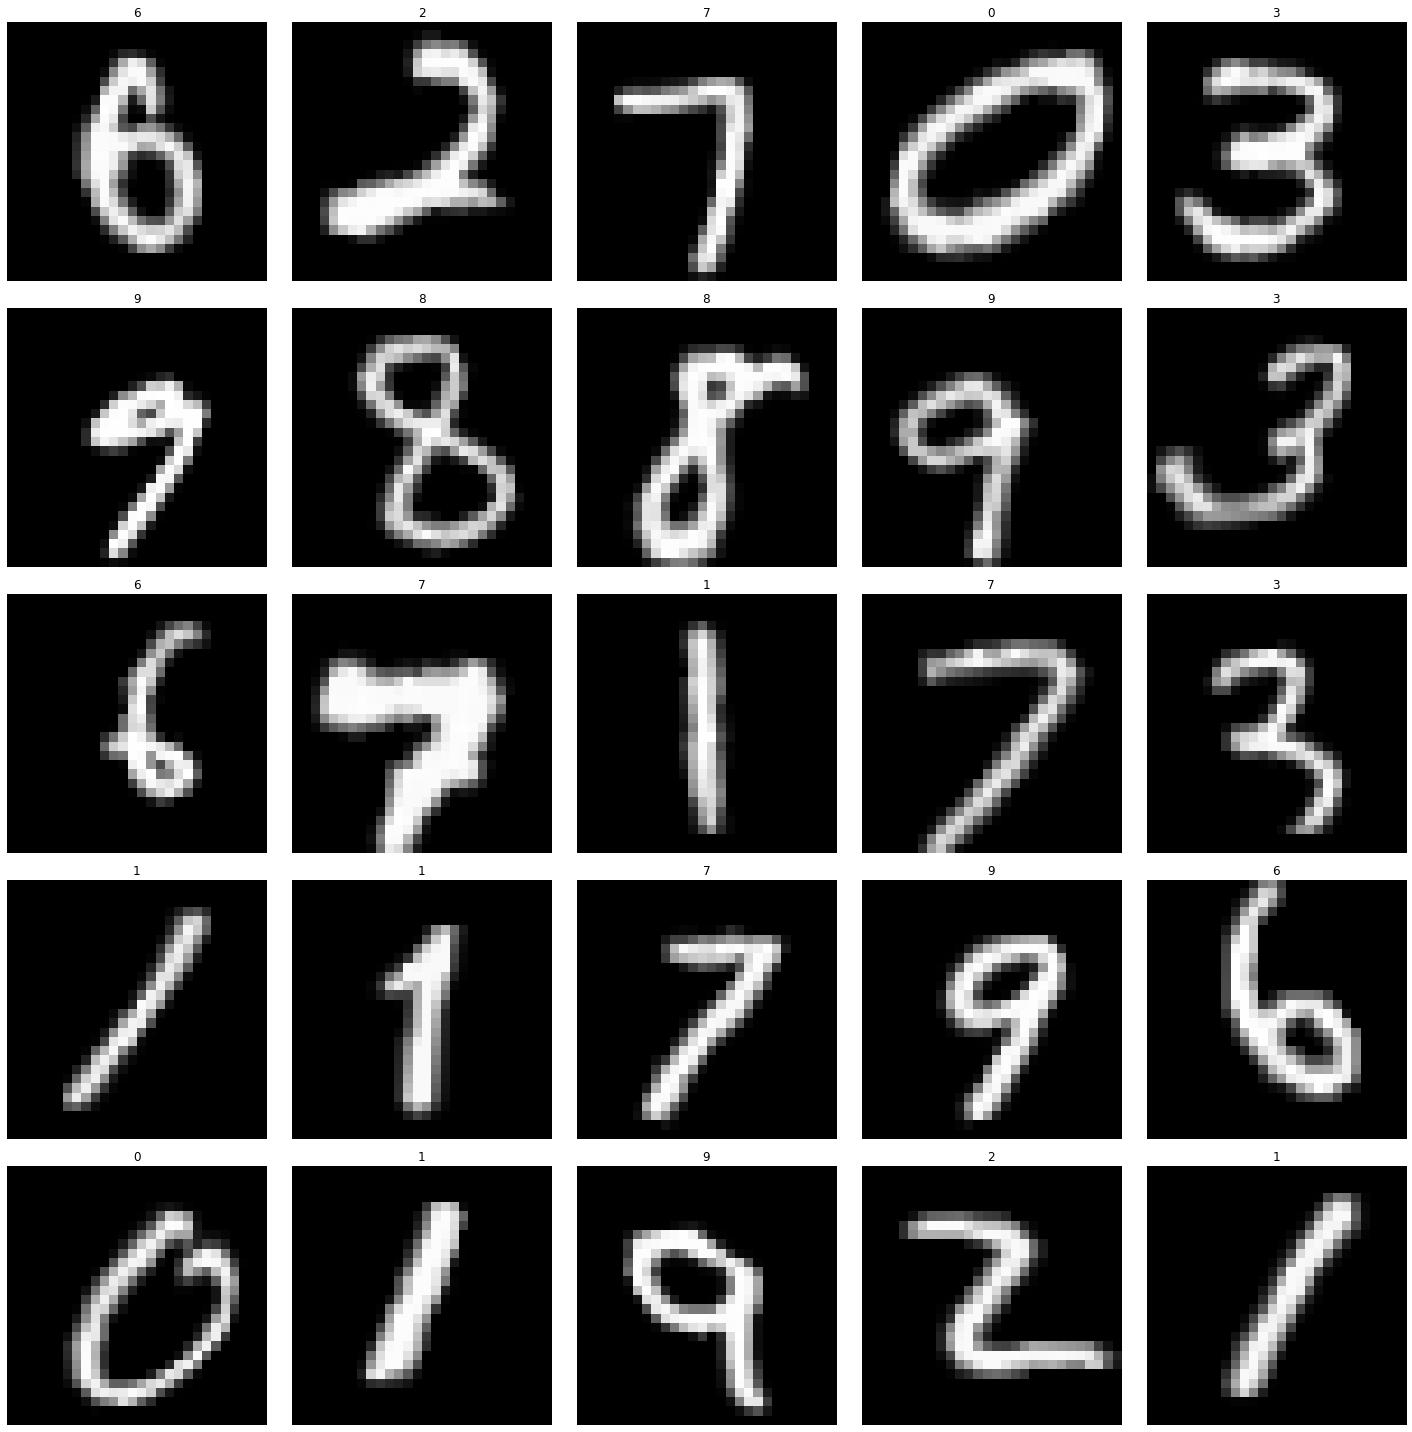

In [23]:
data.show_batch()

In [24]:
data

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,0,0,0,0
Path: mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,0,0,0,0
Path: mnist_png;

Test: None

- Create CNN learner with ResNet18 architecture 
- Load pretrained weights from model in part A)

In [29]:
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)

In [30]:
learn.load('/content/drive/My Drive/MIDAS Task 2/part2-0-9-224-s2');

- Find optimum lr to train

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-03
Min loss divided by 10: 3.63E-02


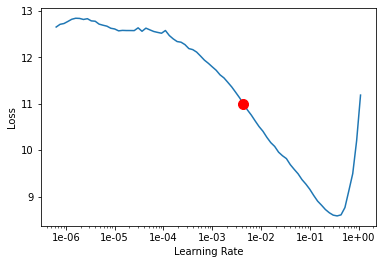

In [31]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

- Fit using lr=4e-2

In [32]:
learn.fit_one_cycle(5, 4e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.327729,0.261087,0.939200,01:55
1,0.317933,0.166053,0.972700,01:54
2,0.195614,0.129923,0.968500,01:55
3,0.057857,0.030088,0.990400,01:55
4,0.030222,0.016739,0.994500,01:56


Plot losses, accuracies and learning rates over the process

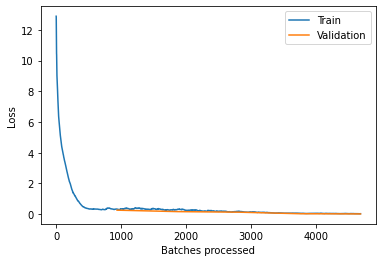

In [33]:
learn.recorder.plot_losses()

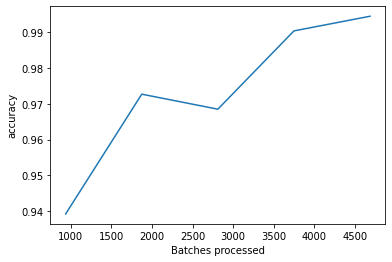

In [34]:
learn.recorder.plot_metrics()

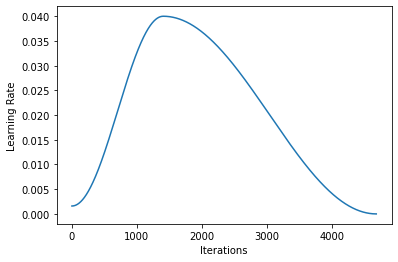

In [35]:
learn.recorder.plot_lr()

Save model

In [36]:
learn.save('/content/drive/My Drive/MIDAS Task 2/part2-mnist-from-pretrained')

## Training from scratch

- Create learner with same architecture but random initialization
- Train with same policy as pretrained

In [37]:
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)

In [38]:
learn.fit_one_cycle(5, 4e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.300445,0.164876,0.961200,01:56
1,0.262916,0.103552,0.983300,01:56
2,0.148213,2.951254,0.972600,01:55
3,0.064117,3.336210,0.987500,01:54
4,0.039002,0.884730,0.992300,01:56


Plot losses, accuracies and lr over the process

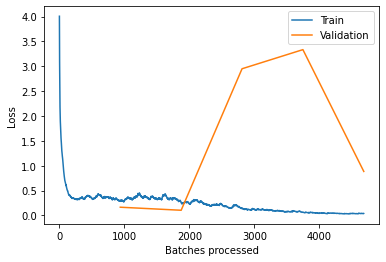

In [40]:
learn.recorder.plot_losses()

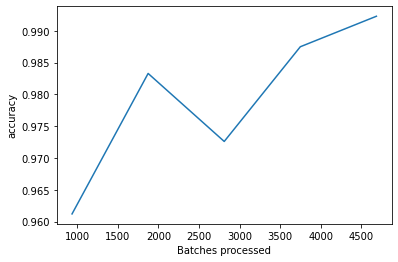

In [41]:
learn.recorder.plot_metrics()

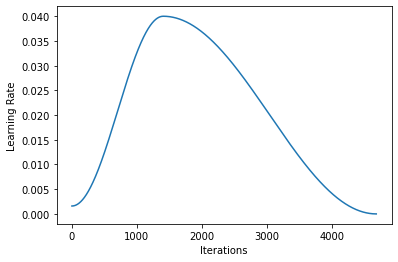

In [42]:
learn.recorder.plot_lr()

Save model

In [39]:
learn.save('/content/drive/My Drive/MIDAS Task 2/part2-mnist-from-scratch')